In [294]:
%matplotlib inline

import os, pathlib, matplotlib
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [295]:
cwd = pathlib.Path.cwd()
raw_data_path = cwd / "data" / "single_family_home_values.csv"

In [296]:
df = pd.read_csv(raw_data_path, header=0)
df.head()

id              address    city state  zipcode   latitude  \
0   39525749      8171 E 84th Ave  Denver    CO    80022  39.849160   
1  184578398    10556 Wheeling St  Denver    CO    80022  39.888020   
2  184430015  3190 Wadsworth Blvd  Denver    CO    80033  39.761710   
3  155129946  3040 Wadsworth Blvd  Denver    CO    80033  39.760780   
4     245107      5615 S Eaton St  Denver    CO    80123  39.616181   

    longitude  bedrooms  bathrooms  rooms  squareFootage  lotSize  yearBuilt  \
0 -104.893468         3        2.0      6           1378     9968     2003.0   
1 -104.830930         2        2.0      6           1653     6970     2004.0   
2 -105.081070         3        1.0      0           1882    23875     1917.0   
3 -105.081060         4        3.0      0           2400    11500     1956.0   
4 -105.058812         3        4.0      8           2305     5600     1998.0   

  lastSaleDate  lastSaleAmount priorSaleDate  priorSaleAmount  estimated_value  
0   2009-12-17           75000    2004-05-13         165700.0           239753  
1   2004-09-23          216935           NaN              NaN           343963  
2   2008-04-03          330000           NaN              NaN           488840  
3   2008-12-02          185000    2008-06-27              0.0           494073  
4   2012-07-18          308000    2011-12-29              0.0           513676

In [297]:
# Extreme Values:
df.sort_values(by='estimated_value', ascending=False, inplace=True)
df.head(10)

id                address    city state  zipcode   latitude  \
8448   184318691          575 Circle Dr  Denver    CO    80206  39.724562   
8173    51266875         2109 E 9th Ave  Denver    CO    80206  39.730670   
7022    28612816         2025 E 4th Ave  Denver    CO    80206  39.722886   
13951   51438767    3303 E Kentucky Ave  Denver    CO    80209  39.700009   
13293    4277908    3333 E Kentucky Ave  Denver    CO    80209  39.699654   
13655   51047101  600 S University Blvd  Denver    CO    80209  39.706183   
8798    24571185        450 Westwood Dr  Denver    CO    80206  39.723917   
6907   219388943       333 Milwaukee St  Denver    CO    80206  39.721639   
13442   51173401  680 S University Blvd  Denver    CO    80209  39.704374   
7592   204940560            161 Race St  Denver    CO    80206  39.718700   

        longitude  bedrooms  bathrooms  rooms  squareFootage  lotSize  \
8448  -104.962436         5        9.0     14           7353    33100   
8173  -104.962130         9        8.0     16          10907    42381   
7022  -104.962445         5        7.0     13           5662    36200   
13951 -104.948047         5        8.0     16           9780    43300   
13293 -104.947751         6        9.0     16           8456    20300   
13655 -104.957094         5        6.0     14           7200   122839   
8798  -104.961647         6        8.0     11           6622    24700   
6907  -104.952569         3        6.0      7           4627    14061   
13442 -104.958606         6        8.0     13           7187    97125   
7592  -104.963750         5        8.0     15           7772    33470   

       yearBuilt lastSaleDate  lastSaleAmount priorSaleDate  priorSaleAmount  \
8448      1931.0   2013-03-06         6800000    1998-04-07        2300000.0   
8173      1918.0   2010-07-01         4500000    2004-05-04              0.0   
7022      1929.0   2008-07-10         5475000    2002-07-03        3000000.0   
13951     2003.0   2000-08-08         1471500           NaN              NaN   
13293     2004.0   2005-09-01         4650000    2002-04-15         850000.0   
13655     2001.0   1999-02-23         2000000           NaN              NaN   
8798      1942.0   2013-01-04         4850000    2008-07-18        3020000.0   
6907      2014.0   2016-11-23         7000000    2016-10-21              0.0   
13442     2002.0   2014-05-23         4800000    2000-10-04        1950000.0   
7592      1919.0   2001-01-26         3075000           NaN              NaN   

       estimated_value  
8448          10145310  
8173           9093801  
7022           8424973  
13951          7976662  
13293          7860355  
13655          7582992  
8798           7350472  
6907           7317046  
13442          6538208  
7592           6374718

In [298]:
# Extreme Values:
df.sort_values(by='lastSaleAmount', ascending=False, inplace=True)
df.head(20)

id                 address    city state  zipcode   latitude  \
2971    18197588         1330 Osceola St  Denver    CO    80204  39.737183   
2473    18197589         1320 Osceola St  Denver    CO    80204  39.737062   
2220    18197590         1350 Osceola St  Denver    CO    80204  39.737493   
13831  152260607     3481 E Kentucky Ave  Denver    CO    80209  39.699982   
13783  206263498    2821 E Cedar Ave # 5  Denver    CO    80209  39.713170   
202     46387650         1627 N Pearl St  Denver    CO    80203  39.742182   
6419   184285442     3300 N Elizabeth St  Denver    CO    80205  39.763398   
13713  219388956  401 S Garfield St # 11  Denver    CO    80209  39.709130   
6907   219388943        333 Milwaukee St  Denver    CO    80206  39.721639   
8448   184318691           575 Circle Dr  Denver    CO    80206  39.724562   
7069    24571184             210 Vine St  Denver    CO    80206  39.719695   
7022    28612816          2025 E 4th Ave  Denver    CO    80206  39.722886   
7991    14694825          910 Gaylord St  Denver    CO    80206  39.730812   
8798    24571185         450 Westwood Dr  Denver    CO    80206  39.723917   
13442   51173401   680 S University Blvd  Denver    CO    80209  39.704374   
7030   143710121             400 Cook St  Denver    CO    80206  39.722780   
13293    4277908     3333 E Kentucky Ave  Denver    CO    80209  39.699654   
13398   39583502        35 Polo Club Cir  Denver    CO    80209  39.705573   
8173    51266875          2109 E 9th Ave  Denver    CO    80206  39.730670   
8428    16439675       407 Saint Paul St  Denver    CO    80206  39.722830   

        longitude  bedrooms  bathrooms  rooms  squareFootage  lotSize  \
2971  -105.037810         2        1.0      5           1262     4690   
2473  -105.037810         2        1.0      4            700     6250   
2220  -105.037811         2        1.0      6            929     4690   
13831 -104.947079         6        5.0     13           4651    49900   
13783 -104.954070         2        6.0      6           3880    10125   
202   -104.980183         3        3.0      9           1548     6312   
6419  -104.955721         3        2.0      5           1515     6640   
13713 -104.946625         1        1.0      3           1061    12230   
6907  -104.952569         3        6.0      7           4627    14061   
8448  -104.962436         5        9.0     14           7353    33100   
7069  -104.961633         4        7.0     13           8228    16300   
7022  -104.962445         5        7.0     13           5662    36200   
7991  -104.961023         4        7.0     16           7561    21300   
8798  -104.961647         6        8.0     11           6622    24700   
13442 -104.958606         6        8.0     13           7187    97125   
7030  -104.947040         4        6.0     12           6175    12500   
13293 -104.947751         6        9.0     16           8456    20300   
13398 -104.951568         4        9.0     12           6160    25100   
8173  -104.962130         9        8.0     16          10907    42381   
8428  -104.951290         2        6.0     10           4279     6250   

       yearBuilt lastSaleDate  lastSaleAmount priorSaleDate  priorSaleAmount  \
2971      1907.0   2007-01-19        45600000           NaN              NaN   
2473      1953.0   2007-01-19        45600000           NaN              NaN   
2220      1914.0   2007-01-19        45600000    2002-07-01         157000.0   
13831     1958.0   2011-02-22        21000000           NaN              NaN   
13783     2015.0   2013-07-05        14000000           NaN              NaN   
202       1885.0   2015-07-02        11500000    2012-10-30              0.0   
6419      1952.0   2017-05-16        10625300           NaN          64500.0   
13713     2015.0   2017-04-12         7800000           NaN              NaN   
6907      2014.0   2016-11-23         7000000    2016-10-21              0.0   
8448      1931.0   2013-03-06         680

In [299]:
df.describe()

id       zipcode      latitude     longitude      bedrooms  \
count  1.500000e+04  15000.000000  14985.000000  14985.000000  15000.000000   
mean   5.176229e+07  80204.919467     39.740538   -104.964076      2.708400   
std    6.190876e+07      9.715263      0.023555      0.039788      0.897231   
min    1.433670e+05  80022.000000     39.614531   -105.108440      0.000000   
25%    1.004802e+07  80205.000000     39.727634   -104.978737      2.000000   
50%    2.563241e+07  80206.000000     39.748048   -104.957689      3.000000   
75%    5.114222e+07  80207.000000     39.758214   -104.937522      3.000000   
max    3.209481e+08  80209.000000     39.888020   -104.830930     15.000000   

          bathrooms         rooms  squareFootage       lotSize     yearBuilt  \
count  15000.000000  15000.000000   15000.000000   15000.00000  14999.000000   
mean       2.195067      6.164133    1514.504400    5820.76620   1929.517168   
std        1.166279      1.958601     830.635999    3013.27947     29.937051   
min        0.000000      0.000000     350.000000     278.00000   1874.000000   
25%        1.000000      5.000000     986.000000    4620.00000   1907.000000   
50%        2.000000      6.000000    1267.500000    5950.00000   1925.000000   
75%        3.000000      7.000000    1766.250000    6270.00000   1949.000000   
max       12.000000     39.000000   10907.000000  122839.00000   2016.000000   

       lastSaleAmount  priorSaleAmount  estimated_value  
count    1.500000e+04     1.128700e+04     1.500000e+04  
mean     4.053563e+05     2.594350e+05     6.371625e+05  
std      7.756998e+05     3.379387e+05     5.044185e+05  
min      2.590000e+02     0.000000e+00     1.477670e+05  
25%      1.940000e+05     1.100000e+05     3.984348e+05  
50%      3.200000e+05     2.100000e+05     5.183575e+05  
75%      4.632000e+05     3.302400e+05     6.879692e+05  
max      4.560000e+07     1.600000e+07     1.014531e+07

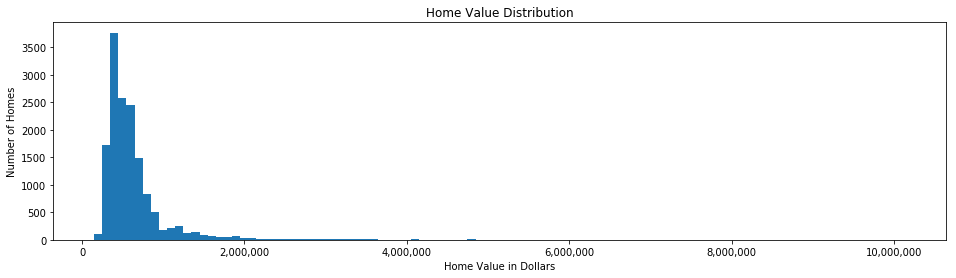

In [300]:
ax = df['estimated_value'].plot(kind="hist", bins=100, figsize=(16,4), title="Home Value Distribution")
ax.set_xlabel("Home Value in Dollars")
ax.set_ylabel("Number of Homes")
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

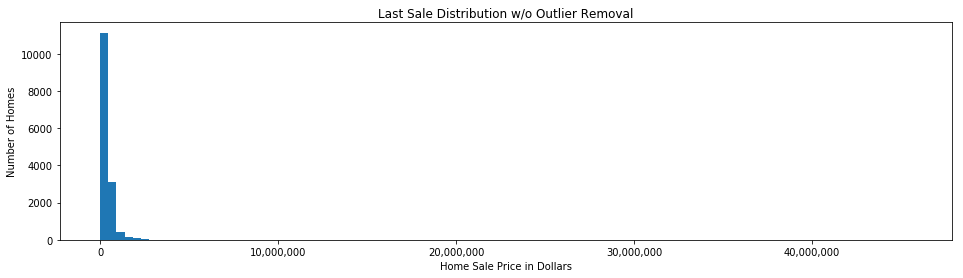

In [301]:
ax = df['lastSaleAmount'].plot(kind="hist", bins=100, figsize=(16,4), title="Last Sale Distribution w/o Outlier Removal")
ax.set_xlabel("Home Sale Price in Dollars")
ax.set_ylabel("Number of Homes")
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

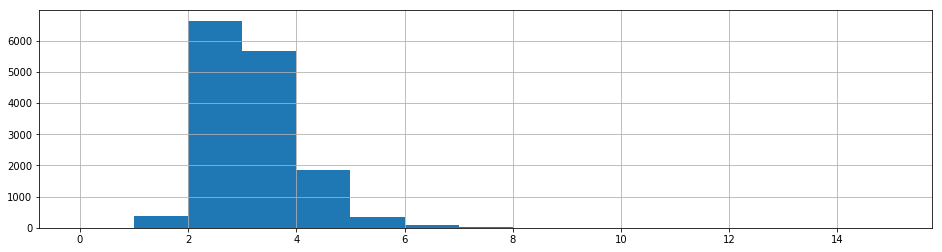

In [302]:
df['bedrooms'].hist(bins=15, figsize=(16,4))

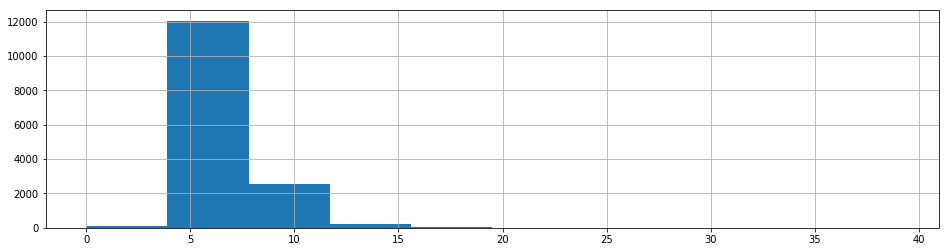

In [303]:
df['rooms'].hist(figsize=(16,4))

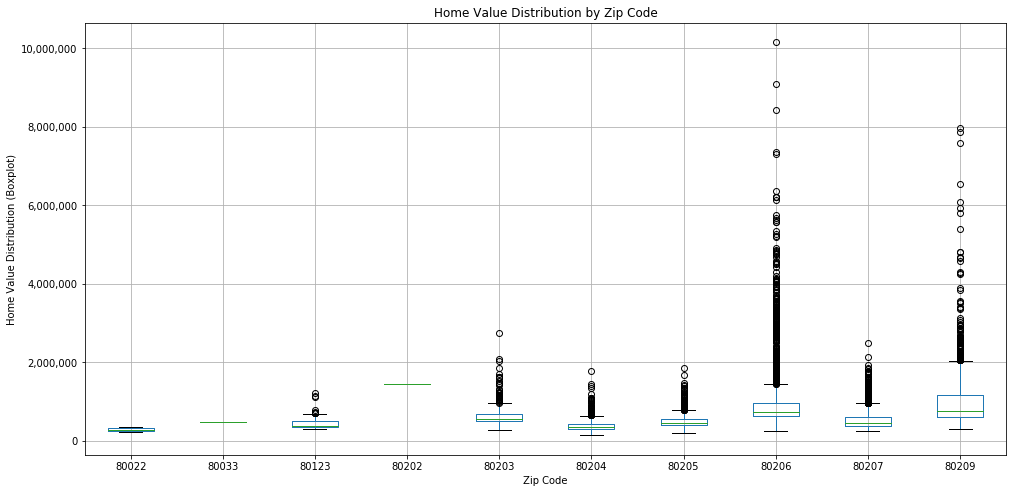

In [304]:
ax = df.boxplot(column='estimated_value', by='zipcode', figsize=(16,8))
plt.title("Home Value Distribution by Zip Code")
plt.suptitle("")
ax.set_xlabel("Zip Code")
ax.set_ylabel("Home Value Distribution (Boxplot)")
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [305]:
raw_cols_to_keep = ['estimated_value', 'bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize'
    , 'yearBuilt', 'lastSaleAmount', 'priorSaleAmount']
# ax = scatter_matrix(df[raw_cols_to_keep], alpha=0.2, figsize=(16, 8), diagonal='kde')  # << Expensive plot to make, so commented out.
# plt.title("Windfall Home Values Scatterplot Matrix")

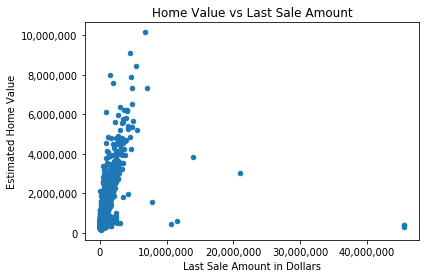

In [306]:
ax = df.plot.scatter(x='lastSaleAmount', y='estimated_value', title="Home Value vs Last Sale Amount")
ax.set_xlabel("Last Sale Amount in Dollars")
ax.set_ylabel("Estimated Home Value")
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

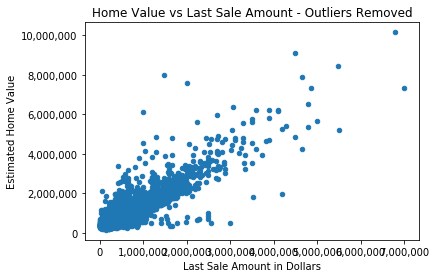

In [307]:
df.loc[df['lastSaleAmount'] > 7000000, 'lastSaleAmount'] = np.nan
ax = df.plot.scatter(x='lastSaleAmount', y='estimated_value', title="Home Value vs Last Sale Amount - Outliers Removed")
ax.set_xlabel("Last Sale Amount in Dollars")
ax.set_ylabel("Estimated Home Value")
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [308]:
df[df['squareFootage']== 1262].head()

id          address    city state  zipcode   latitude  \
2971    18197588  1330 Osceola St  Denver    CO    80204  39.737183   
8923   184764046  864 Harrison St  Denver    CO    80206  39.730296   
12845   43167506   2691 Dexter St  Denver    CO    80207  39.756370   
8924    11196661  201 Harrison St  Denver    CO    80206  39.719646   

        longitude  bedrooms  bathrooms  rooms  squareFootage  lotSize  \
2971  -105.037810         2        1.0      5           1262     4690   
8923  -104.941542         3        2.0      6           1262     5950   
12845 -104.933126         2        3.0      6           1262     3810   
8924  -104.941543         2        2.0      5           1262     4100   

       yearBuilt lastSaleDate  lastSaleAmount priorSaleDate  priorSaleAmount  \
2971      1907.0   2007-01-19             NaN           NaN              NaN   
8923      1924.0   2016-05-05        556000.0    2015-11-12         330000.0   
12845     1923.0   2015-06-17        530000.0    2009-06-01         370000.0   
8924      1952.0   2007-02-02        325000.0    1999-09-22         212900.0   

       estimated_value  
2971            397880  
8923            482663  
12845           571297  
8924            456938

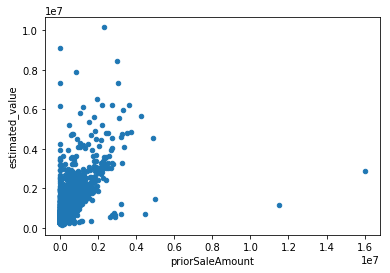

In [309]:
df.plot.scatter(x='priorSaleAmount', y='estimated_value')

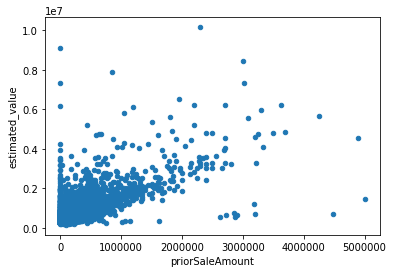

In [310]:
df.loc[df['priorSaleAmount'] > 7000000, 'priorSaleAmount'] = np.nan
df.plot.scatter(x='priorSaleAmount', y='estimated_value')

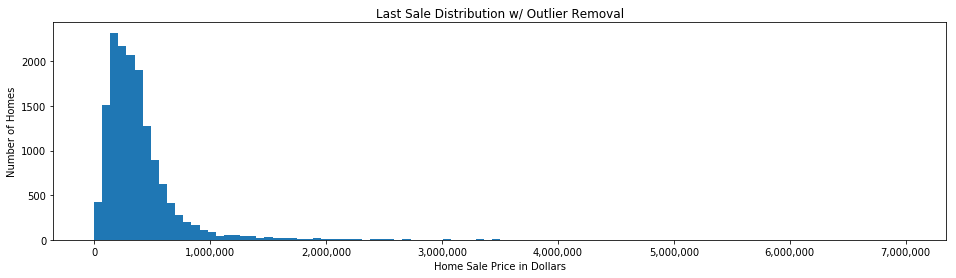

In [311]:
ax = df['lastSaleAmount'].plot(kind="hist", bins=100, figsize=(16,4), title="Last Sale Distribution w/ Outlier Removal")
ax.set_xlabel("Home Sale Price in Dollars")
ax.set_ylabel("Number of Homes")
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))